In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('C:/Users/prana/Desktop/final year project/Fertilizer Prediction.csv')
print(data.head())

   Temparature  Humidity   Moisture SoilType   CropType  Nitrogen  Potassium  \
0           26         52        38    Sandy      Maize        37          0   
1           29         52        45    Loamy  Sugarcane        12          0   
2           34         65        62    Black     Cotton         7          9   
3           32         62        34      Red    Tobacco        22          0   
4           28         54        46   Clayey      Paddy        35          0   

   Phosphorous FertilizerName  
0            0           Urea  
1           36            DAP  
2           30  NPK(14-35-14)  
3           20  GROMOR(28-28)  
4            0           Urea  


In [3]:
data.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'SoilType', 'CropType',
       'Nitrogen', 'Potassium', 'Phosphorous', 'FertilizerName'],
      dtype='object')

In [4]:
data_X=data.iloc[:,:-1]
data_y=data.iloc[:,-1]

In [5]:
data_y

0              Urea
1               DAP
2     NPK(14-35-14)
3     GROMOR(28-28)
4              Urea
          ...      
94    GROMOR(28-28)
95         10-26-26
96             Urea
97              DAP
98       NPK(20-20)
Name: FertilizerName, Length: 99, dtype: object

In [6]:
data_X

,Temparature,Humidity,Moisture,SoilType,CropType,Nitrogen,Potassium,Phosphorous
0,26,52,38,Sandy,Maize,37,0,0
1,29,52,45,Loamy,Sugarcane,12,0,36
2,34,65,62,Black,Cotton,7,9,30
3,32,62,34,Red,Tobacco,22,0,20
4,28,54,46,Clayey,Paddy,35,0,0
...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19
95,30,60,27,Red,Tobacco,4,17,17
96,38,72,51,Loamy,Wheat,39,0,0
97,36,60,43,Sandy,Millets,15,0,41


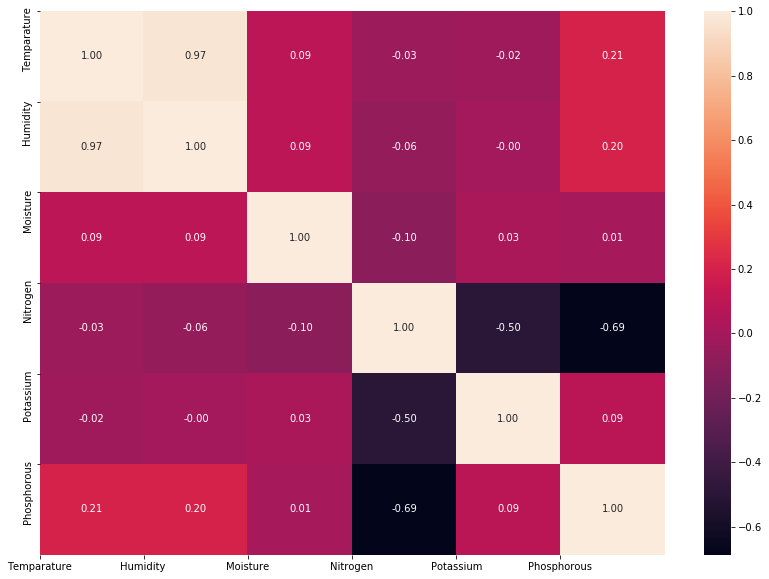

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
corr=data_X.corr()
#Plot figsize
fig,ax=plt.subplots(figsize=(14,10))

 #Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr,annot=True,fmt=".2f")    

#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

(array([ 7., 12., 14., 14., 13., 10.,  7.,  4.,  6., 12.]),
 array([25., 29., 33., 37., 41., 45., 49., 53., 57., 61., 65.]),
 <a list of 10 Patch objects>)

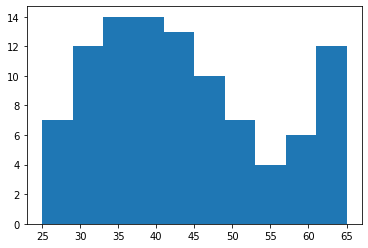

In [8]:
plt.hist(data=data_X, x='Moisture')


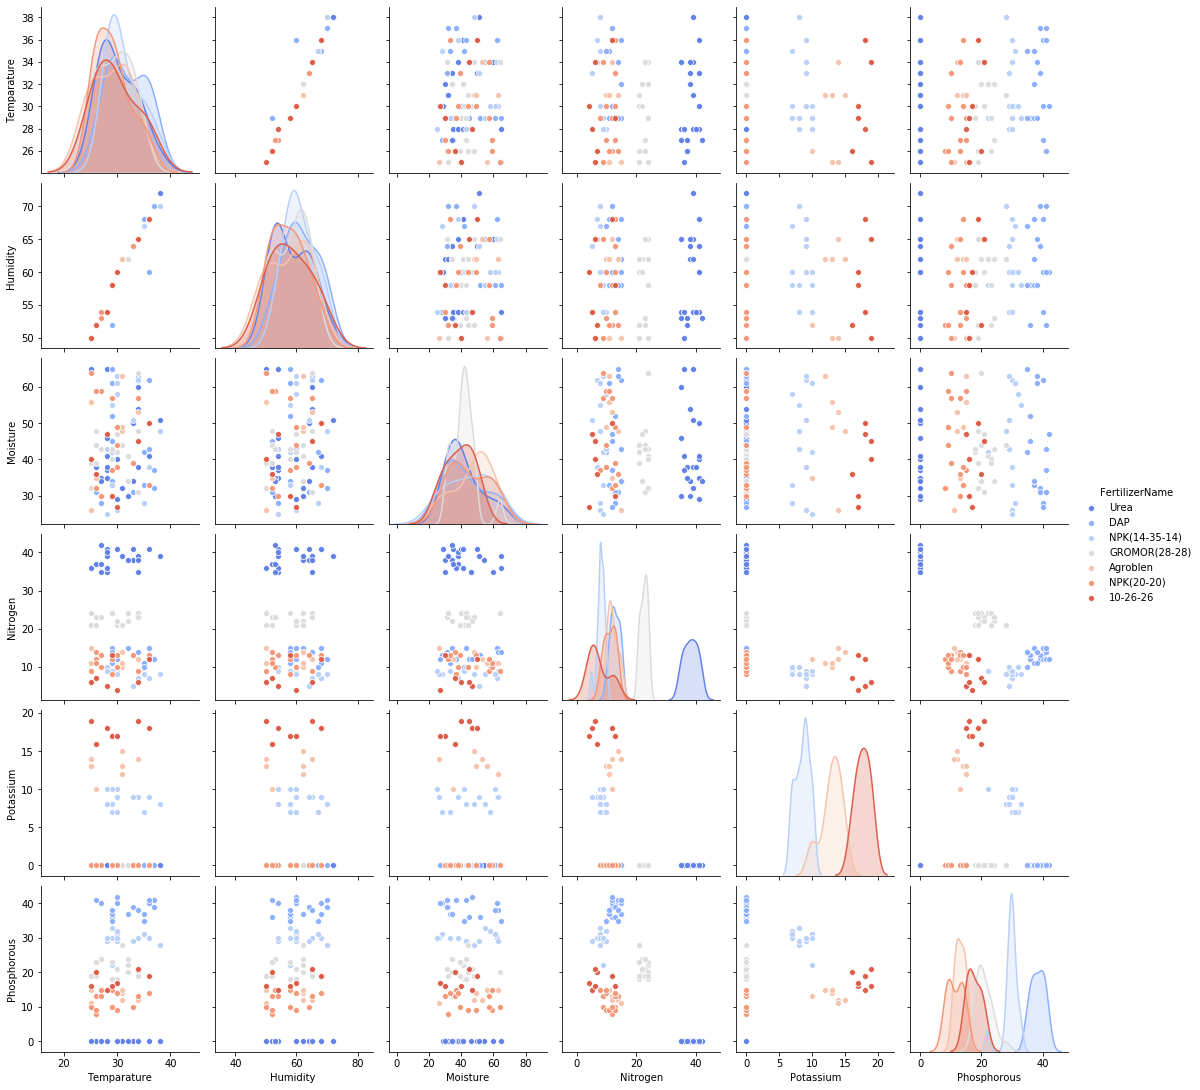

In [9]:
sns.pairplot(data,hue='FertilizerName',palette='coolwarm')

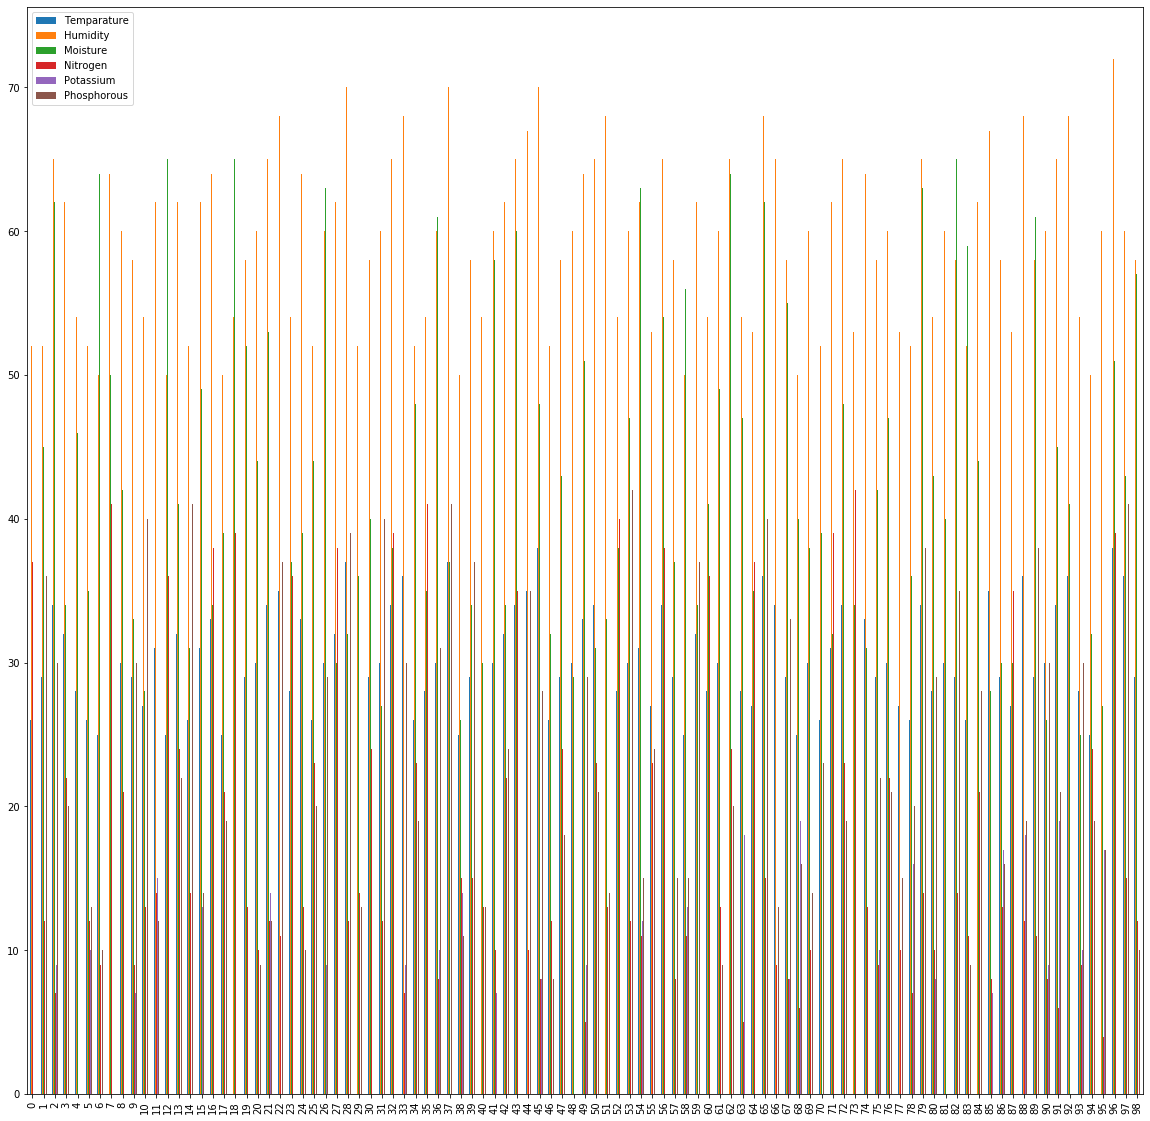

In [10]:
data.plot.bar(figsize=(20,20))

In [11]:
label= pd.get_dummies(data.FertilizerName).iloc[: , 1:]
data= pd.concat([data,label],axis=1)
data.head()

,Temparature,Humidity,Moisture,SoilType,CropType,Nitrogen,Potassium,Phosphorous,FertilizerName,Agroblen,DAP,GROMOR(28-28),NPK(14-35-14),NPK(20-20),Urea
0,26,52,38,Sandy,Maize,37,0,0,Urea,0,0,0,0,0,1
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP,0,1,0,0,0,0
2,34,65,62,Black,Cotton,7,9,30,NPK(14-35-14),0,0,0,1,0,0
3,32,62,34,Red,Tobacco,22,0,20,GROMOR(28-28),0,0,1,0,0,0
4,28,54,46,Clayey,Paddy,35,0,0,Urea,0,0,0,0,0,1


In [12]:
data.drop('FertilizerName', axis=1,inplace=True)
data.drop('SoilType', axis=1,inplace=True)
data.drop('CropType', axis=1,inplace=True)
data.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Agroblen,DAP,GROMOR(28-28),NPK(14-35-14),NPK(20-20),Urea
0,26,52,38,37,0,0,0,0,0,0,0,1
1,29,52,45,12,0,36,0,1,0,0,0,0
2,34,65,62,7,9,30,0,0,0,1,0,0
3,32,62,34,22,0,20,0,0,1,0,0,0
4,28,54,46,35,0,0,0,0,0,0,0,1


In [13]:
train=data.iloc[:, 0:6].values
train

array([[26, 52, 38, 37,  0,  0],
       [29, 52, 45, 12,  0, 36],
       [34, 65, 62,  7,  9, 30],
       [32, 62, 34, 22,  0, 20],
       [28, 54, 46, 35,  0,  0],
       [26, 52, 35, 12, 10, 13],
       [25, 50, 64,  9,  0, 10],
       [33, 64, 50, 41,  0,  0],
       [30, 60, 42, 21,  0, 18],
       [29, 58, 33,  9,  7, 30],
       [27, 54, 28, 13,  0, 40],
       [31, 62, 48, 14, 15, 12],
       [25, 50, 65, 36,  0,  0],
       [32, 62, 41, 24,  0, 22],
       [26, 52, 31, 14,  0, 41],
       [31, 62, 49, 10, 13, 14],
       [33, 64, 34, 38,  0,  0],
       [25, 50, 39, 21,  0, 19],
       [28, 54, 65, 39,  0,  0],
       [29, 58, 52, 13,  0, 36],
       [30, 60, 44, 10,  0,  9],
       [34, 65, 53, 12, 14, 12],
       [35, 68, 33, 11,  0, 37],
       [28, 54, 37, 36,  0,  0],
       [33, 64, 39, 13,  0, 10],
       [26, 52, 44, 23,  0, 20],
       [30, 60, 63,  9,  9, 29],
       [32, 62, 30, 38,  0,  0],
       [37, 70, 32, 12,  0, 39],
       [26, 52, 36, 14,  0, 13],
       [29

In [14]:
test=data.iloc[: ,6:].values
test

array([[0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
 

In [15]:
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.3,random_state=1)


In [16]:
X_train=list(X_train)
for i in range(len(X_train)):
    X_train[i]=[int(j) for j in X_train[i]]
    
X_test=list(X_test)
for i in range(len(X_test)):
    X_test[i]=[int(j) for j in X_test[i]]

In [17]:
y_train=list(y_train)
for i in range(len(y_train)):
    y_train[i]=[int(j) for j in y_train[i]]
    
y_test=list(y_test)
for i in range(len(y_test)):
    y_test[i]=[int(j) for j in y_test[i]]

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
X_test

array([[ 1.70399354,  1.55871743, -0.23642405,  1.95902954, -0.53131503,
        -1.38829982],
       [-1.29538284, -1.29979427,  1.4225515 , -0.72120255, -0.53131503,
        -0.72307282],
       [ 1.10411826,  1.02274649, -0.51291998,  1.7803474 , -0.53131503,
        -1.38829982],
       [-0.69550757, -0.94248031, -0.05209344, -0.81054362,  0.94248345,
         0.75520939],
       [-1.29538284, -1.29979427, -0.69725059, -1.07856683,  2.41628192,
         0.0899824 ],
       [-1.59532048, -1.65710823, -0.42075467,  0.17220815, -0.53131503,
         0.01606828],
       [-0.69550757, -0.94248031, -0.7894159 ,  1.95902954, -0.53131503,
        -1.38829982],
       [-0.09563229,  0.12946158, -0.32858936,  1.95902954, -0.53131503,
        -1.38829982],
       [ 1.70399354,  1.55871743,  0.59306372, -0.63186148,  2.78473154,
         0.01606828],
       [ 1.10411826,  1.02274649,  0.13223718, -1.1679079 ,  2.96895635,
         0.16389651],
       [ 2.30386881,  1.91603139,  0.40873311, -0.

In [20]:
from sklearn.ensemble import RandomForestClassifier
algo=RandomForestClassifier(n_estimators=10,random_state=10)

In [21]:
algo.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [22]:
pred1=algo.predict(X_test)
a1=algo.score(X_test,y_test)
a1

0.9

In [23]:
from sklearn.metrics import accuracy_score

a=accuracy_score(y_test,pred1)
print("The accuracy of this model is: ", a*100)

The accuracy of this model is:  90.0


In [24]:
#knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [25]:
pred = knn.predict(X_test)
k=knn.score(X_test,y_test)
k

0.7666666666666667

In [26]:
from prettytable import PrettyTable

In [27]:
model=['KNN','Random Forest']
AUC=[k,a]
table= PrettyTable()

table.add_column("Model",model)
table.add_column("AUC",AUC)
print(table)

+---------------+--------------------+
|     Model     |        AUC         |
+---------------+--------------------+
|      KNN      | 0.7666666666666667 |
| Random Forest |        0.9         |
+---------------+--------------------+


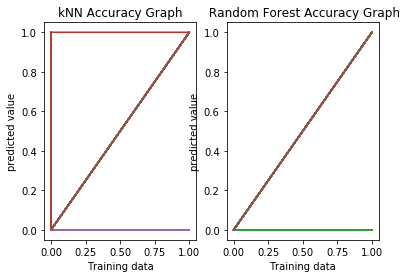

In [28]:
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)

plt.plot(y_test, pred)
plt.xlabel("Training data")
plt.ylabel("predicted value")
plt.title("kNN Accuracy Graph")

plt.subplot(1,2,2)
plt.plot(y_test, pred1)
plt.xlabel("Training data")
plt.ylabel("predicted value")
plt.title(" Random Forest Accuracy Graph")

plt.show()

In [29]:
t=int(input("enter temperature in Celsius: \t"))
h=int(input("enter humidity in gm of water vapor/kg of air: \t"))
m=int(input("enter mositure in g/m³ \t"))
n=int(input("enter nitrogen in grams per sq.ft \t"))
po=int(input("enter potassium in grams per sq.ft\t"))
ph=int(input("enter phosphorus in grams per sq.ft \t"))

enter temperature in Celsius: 	25
enter humidity in gm of water vapor/kg of air: 	60
enter mositure in g/m³ 	50
enter nitrogen in grams per sq.ft 	20
enter potassium in grams per sq.ft	10
enter phosphorus in grams per sq.ft 	5


In [30]:
x=[[t,h,m,n,po,ph]]
x = sc.transform(x)
res=algo.predict(x)
kres=knn.predict(x)
print(res,"\n",kres)

[[1 0 0 0 0 0]] 
 [[1 0 0 0 0 0]]


In [31]:
fert=['Agroblen','DAP','GROMOR(28-28)','NPK(14-35-14)','NPK(20-20)']
fr="Urea"

In [32]:
count=0
for i in range(0,5):
        if(res[0][i]==1):
            c=fert[i]
            count=count+1
            break;
        i=i+1
if(count==0):
    print('The predicted fertilizer using Random Forest alg is %s'%fr)
else:
    print('The predicted fertiizer using Random Forest alg is %s'%c)

The predicted fertiizer using Random Forest alg is Agroblen


In [33]:
count1=0
for i in range(0,5):
        if(kres[0][i]==1):
            c1=fert[i]
            count1=count1+1
            break;
        i=i+1
if(count1==0):
    print('The predicted fertilizer using KNN alg is %s'%fr)
else:
    print('The predicted fertiizer usingKNN alg is %s'%c1)

The predicted fertiizer usingKNN alg is Agroblen


In [34]:
outcome = []
model_names = []
models = [
          ('KNN', knn),
          ('RandomForest', algo)]
from sklearn import model_selection
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=2, random_state=16, shuffle=True)
    results = model_selection.cross_val_score(model, X_train, y_train, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

KNN| Mean=0.827311 STD=0.084454
RandomForest| Mean=0.854622 STD=0.031092


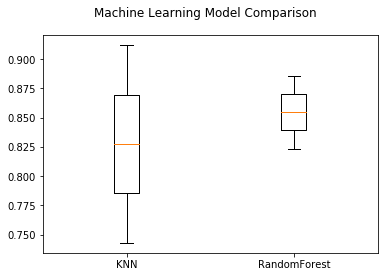

In [35]:
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()